# 사전학습 모델 활용

In [1]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import decode_predictions
import numpy as np

In [2]:
model=ResNet50(weights='imagenet')

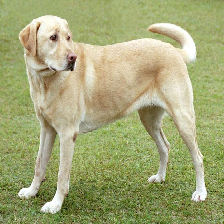

In [3]:
image_path='./datas_dnn/YellowLabradorLooking_new.jpg'
img=image.load_img(image_path, target_size=(224,224))
img

In [4]:
# DNN은 숫자로 입력해야 함
x=image.img_to_array(img)
x[:2]

array([[[156., 161.,  95.],
        [154., 163., 100.],
        [165., 177., 115.],
        ...,
        [134., 139.,  83.],
        [134., 139.,  83.],
        [133., 139.,  79.]],

       [[151., 157.,  93.],
        [154., 163., 100.],
        [165., 177., 115.],
        ...,
        [141., 149.,  92.],
        [134., 142.,  83.],
        [143., 151.,  91.]]], shape=(2, 224, 3), dtype=float32)

In [5]:
# 224, 224는 위에 설정한 크기, 3은 채널 숫자
x.shape

(224, 224, 3)

In [6]:
# expand_dims : 차원 확장
# 학습할때와 동일한 x 데이터의 구조를 만들기 위해
# (224, 224, 3) <-이미지 데이터
    # 3 = R,G,B 3원색 층을 모두 통과한다는 의미. 1이 오는 경우는 gray scale로 밝기층 한가지만 있으면 돼서
# axis=0, 행을 추가하는 것 <- 사진의 장수(1장)
# (1, 224, 224, 3) <- 사진 1장의 정보, shape
x=np.expand_dims(x,axis=0)

In [7]:
# 추론
pred=model.predict(x,verbose=0)

In [ ]:
# 1000의 label 데이터를 학습한 것
# pred[:10]
pred.shape

(1, 1000)

In [9]:
decode_predictions(pred, top=3)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[[('n02099712', 'Labrador_retriever', np.float32(0.26897678)),
  ('n02108089', 'boxer', np.float32(0.1514955)),
  ('n02099849', 'Chesapeake_Bay_retriever', np.float32(0.10756582))]]

In [13]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
resnet_model = ResNet50(input_shape=(224,224,3), include_top=False)
resnet_model.trainable=True

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [15]:
model=Sequential()
model.add(resnet_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │     102,761,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           3,075 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 126,352,259 (482.00 MB)

 Trainable params: 126,299,139 (481.79 MB)

 Non-trainable params: 53,120 (207.50 KB)